---
authors: 
  - Chinming Zhu
    
---

# Fotovoltaïsche Zonnecel

## Inleiding
De werking van een fotovoltaïsche zonnecel is gebaseerd op de interactie tussen fotonen (met een bepaalde energie $E_p$) en de vrije elektronen in een halfgeleidermateriaal.
De elektronen kunnen door interactie met een invallend foton naar een hoger energieniveau worden gebracht.
Als het elektron vervolgens terugvalt naar zijn oorspronkelijke energieniveau, kan de vrijgekomen energie worden gebruikt om extern elektrische stroom te genereren.
In een beschouwing van een goede keuze voor de bandgap-energie (die afhangt van het gekozen materiaal), moeten we twee 'tegenstrijdige' situaties beschouwen:

1. $E_p > E_g$  
 Wanneer een invallend foton een energie heeft die groter is dan de zogenaamde bandgap-energie $E_g$ van het halfgeleidermateriaal ($E_p > E_g$), dan zal de energie van een elektron in het halfgeleidermateriaal toenemen met een hoeveelheid energie $\Delta E=E_g$. Het “overschot” aan foton-energie ($E_p-E_g$) wordt omgezet in warmte, en gaat "verloren". Het deel van de foton-energie dat in nuttige energie wordt omgezet neemt dus toe als de bandgap-energie groter wordt.

2. $E_p < E_g$  
 Wanneer het invallend foton een energie heeft die kleiner is dan de bandgap-energie $E_g$ van het halfgeleidermateriaal ($E_p < E_g$), dan zal de energie van een elektron niet toenemen. De foton-energie $E_p$ wordt dan omgezet in warmte, en gaat "verloren". Het aantal fotonen dat leidt tot nuttige energie neemt dus af als de bandgap-energie groter wordt.
 
Het resultaat van bovenstaande twee effecten is dat er een optimale bandgap-energie is waarvoor de zonnecel een maximale hoeveelheid foton-energie omzet in nuttige energie.
In deze opgave gaan we uitwerken wat de optimale bandgap-energie is van een fotovoltaïsche zonnecel, voor invallende straling die overeenkomt met het fotonen-spectrum zoals uitgestraald door de zon.
We beschouwen de zon als een zwarte straler met temperatuur $T_z=5800\,\mathrm{K}$.
Daarbij, de bandgap-energie van silicium zonnecellen is $1.10 \; \mathrm{eV} = 1.10 \times 1.602 \times 10^{-19} \; \mathrm{J} = 1.76 \times 10^{-19} \; \mathrm{J}$.



## Stralingswet van Planck – analytisch en numeriek

Volgens de [stralingswet van Planck](https://nl.wikipedia.org/wiki/Wet_van_Planck) wordt de energie (in $\mathrm{W/m^2}$) uitgestraald door een zwart oppervlak met temperatuur $T$ binnen een golflengte-interval tussen $\lambda$ en $\lambda+\Delta \lambda$ gegeven door de Planck-kromme:

$$
E_{\lambda,T} = \frac{2 \pi h c^2}{\lambda^5} \cdot 
\frac{1}{e^{\frac{hc}{\lambda k T}} - 1} \, \Delta \lambda 
$$ (eq:plank)

met:

* $h$ = constante van Planck = $6.626 \cdot 10^{-34} \; \mathrm{J s}$
* $c$ = lichtsnelheid = $2.998 \cdot 10^8 \; \mathrm{m/s}$
* $\lambda$ = golflengte in $\mathrm{m}$
* $T$ = absolute temperatuur in $\mathrm{K}$
* $k$ = constante van Boltzmann = $1.381 \cdot 10^{-23} \; \mathrm{J/K}$

Onderstaande figuur laat zien hoe de verdeling van de stralingsenergie over de golflengtes afhangt van de temperatuur van de straler.
We zien dat de zon (in goede benadering een zwarte straler met een temperatuur van $6000 \; \mathrm{K}$) de meeste stralingsenergie uitzendt bij zichtbaar licht golflengtes ($400-800 \; \mathrm{nm}$).

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/BlackbodySpectrum_loglog_150dpi_en.png/1280px-BlackbodySpectrum_loglog_150dpi_en.png
:width: 50%
:label: fig_planckkromme

De intensiteit van de uitgezonden straling als functie van de golflengte voor verschillende temperaturen van zwarte stralers. Figuur van [wiki](https://nl.wikipedia.org/wiki/Wet_van_Planck#/media/Bestand:BlackbodySpectrum_loglog_150dpi_en.png)
```

In deze opgave gaan we analyseren welke implicaties de Planck kromme van de zon heeft voor het rendement van een fotovoltaïsche zonnecel. 

Tijdens de analyse colleges hebben we afgeleid dat de totale energie die door een zwart oppervlak met temperatuur $T$ wordt gegeven door 

$$
E_T = \int_{0}^{\infty} E_{\lambda,T}\, d\lambda 
    = 2\pi h c^{2} \int_{0}^{\infty} 
      \frac{1}{\lambda^{5}\left( e^{\frac{hc}{\lambda k T}} - 1 \right)} 
      \, d\lambda
    = \frac{2\pi^{5} k^{4}}{15 h^{3} c^{2}} T^{4}
    = \sigma T^{4}
$$ (eq:Et)

met $\sigma = \text{constante van Stefan–Boltzmann} = 5.670 \cdot 10^{-8}\ \mathrm{W/(m^2K^4)}$

Integralen kunnen we benaderen met een zogenaamde Riemann som.
Dit is geïllustreerd in onderstaande figuur (voor een andere functie dan de Planck-kromme).

```{figure} https://upload.wikimedia.org/wikipedia/commons/1/19/Riemann_sum_%28leftbox%29.gif
:width: 50%
:label: fig_Riemann

De integraal, of oppervlak onder een grafiek, kan benaderd worden met de Riemann som. Figuur van [wiki](https://upload.wikimedia.org/wikipedia/commons/1/19/Riemann_sum_%28leftbox%29.gif)

```

$$
E_T = 2\pi h c^2 \int_{0}^{\infty} 
\frac{1}{\lambda^{5}\left( e^{\frac{hc}{\lambda k T}} - 1 \right)} 
\, d\lambda
\approx
2\pi h c^2 
\lim_{\Delta \lambda \to 0}
\sum_{i=1}^{\infty}
\frac{1}{\lambda_i^{5}\left( e^{\frac{hc}{\lambda_i k T}} - 1 \right)} 
\, \Delta \lambda
$$ (eq:riemannnn)


met $\lambda_i = i \cdot \Delta \lambda$

Deze Riemann-som kunnen we oplossen met een Python-script. 
Uiteraard kunnen we niet een oneindig aantal stapjes berekenen in een computer. 
Daarom benaderen we in het Python-programma de Riemann-som voor een eindig aantal stapjes. Dat kan omdat de functie exponentieel afneemt voor grote golflengtes:

$$
E_T \approx 2\pi h c^2
\lim_{\Delta \lambda_0 \to 0}
\sum_{i=1}^{\infty}
\frac{1}{\lambda_i^{5}\left( e^{\frac{hc}{\lambda_i k T}} - 1 \right)}
\, \Delta \lambda_0
\approx 2\pi h c^2
\sum_{i=1}^{N}
\frac{1}{\lambda_i^{5}\left( e^{\frac{hc}{\lambda_i k T}} - 1 \right)}
\, \Delta \lambda_0
$$ (eq:benadering)


waarbij we 'slechts' $N$ stappen nemen met $\lambda_i = i \cdot \Delta \lambda_0$. 
```{note} Links, midden, rechts
De Riemann-som kun je links, midden (centered) en rechts nemen. Voor de Planck kromme kiezen we deze rechts (door te beginnen bij $i=1$). Zouden we $i=0$ kiezen, dan krijgen we $\frac{1}{0}=\infty$... dat is niet gewenst.
```

{exercise} Riemannsom
:label: ex_Riemann
Schrijf een Python programma dat de benaderde Riemann som, vergelijking [](#eq:benadering), uitrekent voor 
-	$\Delta \lambda_0= 10 \; \mathrm{nm}$
-	$N=300$ 
-	$T=5800 \; \mathrm{K}$

Herhaal, om te controleren of we $N$ groot genoeg hebben gekozen en of we $\Delta \lambda_0$ klein genoeg hebben gekozen, je berekening voor 
-	$\Delta \lambda_0=3 \; \mathrm{nm}$
-	$N=...$
-	$T=5800 \; \mathrm{K}$

Bedenk welke waarde van N je moet nemen voor een eerlijk vergelijk.

Vergelijk beide resultaten met de verwachte uitkomst gegeven als vergelijking [](#eq:Et).



In [1]:
import numpy as np

T = 5800
l0 = 10e-9
N = 300

h = 6.626e-34
c = 2.998e8
k = 1.381e-23

a = h*c/(k*T)

def E_T(l0, N):
    """Totale uitgestraalde energie (W/m^2) via Riemannsom."""
    E_lambda_T = 0.0
    for i in np.arange(1, N+1):
        l_i = l0 * i
        E_lambda_T += (2*np.pi*h*c**2 / l_i**5) * (1/(np.exp(a/l_i) - 1)) * l0
    return E_lambda_T

# Berekening voor Δλ0 = 10 nm, N=300
E_10nm = E_T(10e-9, 300)

# "Eerlijk" vergelijk: zelfde λ_max = N*Δλ0
# 10 nm * 300 = 3000 nm => bij 3 nm stap: N = 3000/3 = 1000
E_3nm = E_T(3e-9, 1000)

# Vergelijk met Stefan-Boltzmann: E = σ T^4
sigma = 5.670374419e-8
E_sb = sigma * T**4

print(f"E (Δλ=10 nm, N=300)   = {E_10nm:.6e} W/m^2")
print(f"E (Δλ=3  nm, N=1000)  = {E_3nm:.6e} W/m^2")
print(f"E (σT^4)              = {E_sb:.6e} W/m^2")
print(f"Relatieve fout (10 nm) = {(E_10nm/E_sb - 1)*100:.3f}%")
print(f"Relatieve fout (3  nm) = {(E_3nm/E_sb - 1)*100:.3f}%")


E (Δλ=10 nm, N=300)   = 6.289043e+07 W/m^2
E (Δλ=3  nm, N=1000)  = 6.288625e+07 W/m^2
E (σT^4)              = 6.416877e+07 W/m^2
Relatieve fout (10 nm) = -1.992%
Relatieve fout (3  nm) = -1.999%


C:\Users\zhuch\AppData\Local\Temp\ipykernel_7828\43372590.py:18: RuntimeWarning: overflow encountered in exp
  E_lambda_T += (2*np.pi*h*c**2 / l_i**5) * (1/(np.exp(a/l_i) - 1)) * l0


## Bepaling optimale bandgap-energie van een fotovoltaïsche zonnecel
Een foton met golflengte $\lambda$ heeft een energie $E_p=\frac{hc}{\lambda}$. 
Met vergelijking {numref}`eq:plank` vinden we nu dat het aantal fotonen dat wordt uitgestraald door een zwart oppervlak met temperatuur $T$ binnen een golflengte-interval tussen $\lambda$ en $\lambda+\Delta \lambda$ wordt gegeven door 

$$
N_{\lambda, T} = \frac{E_{\lambda,T}}{E_p} =
\frac{2\pi h c^{2}}{\lambda^{5}} \cdot \frac{1}{e^{\frac{hc}{\lambda k T}} - 1} \cdot \frac{\lambda}{hc}\, \Delta \lambda =
\frac{2\pi c}{\lambda^{4}} \cdot \frac{1}{e^{\frac{hc}{\lambda k T}} - 1}\, \Delta \lambda
\quad
\left[ \frac{\text{aantal fotonen}}{m^{2}\, s} \right]
$$

Fotonen met een energie $E_p$  groter dan de bandgap-energie $E_g$  leveren een nuttige energie $E_g$. Dit is het geval voor fotonen met een golflengte $\lambda < hc/E_g$.
Fotonen met een energie $E_p$  kleiner dan de bandgap-energie $E_g$  leveren een nuttige energie 0. Dit is het geval voor fotonen met een golflengte $\lambda > hc/E_g$.
De totale energie geleverd door de zonnecel bedraagt dus

$$
E_{zc, E_g, T} = 
2\pi c E_g 
\int_{0}^{hc/E_g}
\frac{1}{\lambda^{4}
\left( e^{\frac{hc}{\lambda k T}} - 1 \right)}
\, d\lambda
\approx
2\pi c E_g 
\sum_{i=1}^{hc/(E_g \Delta\lambda_0)}
\frac{1}{\lambda_i^{4}
\left( e^{ \frac{hc}{\lambda_i k T} } - 1 \right)}
\, \Delta\lambda_0
$$

met $\lambda_i = i \cdot \Delta \lambda_0$.

{exercise}
1.	Schrijf een Python programma dat bovenstaande Riemann som (4) uitrekent voor een gegeven $E_g$ en 
-	$\Delta \lambda_0=10\mathrm{nm}$
-	$T=5800\mathrm{K}$
1.	Bereken en plot  als functie van $E_g$ voor $0.5 \mathrm{eV} \leq E_g \leq 2 \mathrm{eV}$.
1.	Wat is, volgens deze modelberekeningen, de optimale bandgap-energie (in eV) voor een zonnecel?



In [2]:
import numpy as np
import matplotlib.pyplot as plt

T = 5800
l0 = 10e-9

h = 6.626e-34
c = 2.998e8
k = 1.381e-23

a = h*c/(k*T)

Eg = 1.1 * 1.602e-19   # voorbeeld (J)

def E_T_2(l0, Eg):
    """Nuttige energie van zonnecel (W/m^2) voor bandgap Eg via Riemannsom."""
    l_max = h*c/Eg                  # maximale golflengte die nog bijdraagt
    N_max = int(l_max / l0)         # aantal stapjes

    E_sum = 0.0
    for i in range(1, N_max+1):
        l_i = i * l0
        E_sum += (1/(l_i**4 * (np.exp(a/l_i) - 1))) * l0

    return 2*np.pi*c*Eg * E_sum

print(f"E_zc(Eg=1.1 eV) ≈ {E_T_2(l0, Eg):.6e} W/m^2")


E_zc(Eg=1.1 eV) ≈ 2.812026e+07 W/m^2


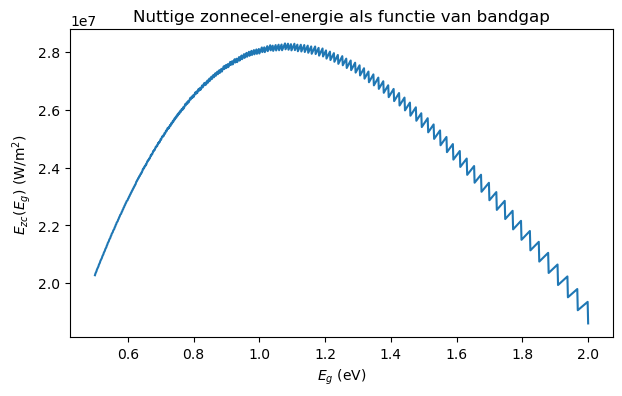

Optimaal Eg ≈ 1.078 eV


In [3]:
E_g = 1.602e-19 * np.linspace(0.5, 2, 1000)  # in Joule
E_g_T = np.array([E_T_2(l0, Eg) for Eg in E_g])

E_g_eV = E_g / 1.602e-19

plt.figure(figsize=(7,4))
plt.plot(E_g_eV, E_g_T)
plt.xlabel(r'$E_g$ (eV)')
plt.ylabel(r'$E_{zc}(E_g)$ (W/m$^2$)')
plt.title('Nuttige zonnecel-energie als functie van bandgap')
plt.show()

i_opt = np.argmax(E_g_T)
print(f"Optimaal Eg ≈ {E_g_eV[i_opt]:.3f} eV")


In [4]:
# Conclusie (uit de berekening)
# De bandgap waarvoor E_zc maximaal is, is hierboven geprint als 'Optimaal Eg'.
